## Importing Libraries for Visulaizations and loading data

In [0]:
## Importing libraries for data visualization and statistical analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading data along with Variable Identification

The dataset is `Classified Ads for Cars`,
`Used cars for sale in Germany and Czech Republic since 2015`. It has `CC0: Public Domain`. The dataset contains 3.5 million rows and 16 columns(5 numerical and 11 categorical data).

The brief description of the features in the dataset are:

    * model - normalized all lowercase
    * mileage - in KM
    * manufacture_year
    * engine_displacement - in ccm
    * engine_power - in kW
    * body_type - almost never present, but I scraped only personal cars,
       no motorcycles or utility vehicles
    * color_slug - also almost never present
    * stk_year - year of the last emission control
    * transmission - automatic or manual
    * door_count
    * seat_count
    * fuel_type - gasoline, diesel, cng, lpg, electric
    * date_created - when the ad was scraped
    * datelastseen - when the ad was last seen. Our policy was to remove all 
      ads  older than 60 days
    * price_eur - list price converted to EUR

The target feature in the dataset is `price_eur`.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
## car_ads_data = pd.read_csv('../data/car_ads.csv')

In [0]:
car_ads_data = pd.read_csv('/content/drive/My Drive/AI Training/all_anonymized_2015_11_2017_03.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
car_ads_data.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


In [0]:
car_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


The above output give the information about the data types of the features int the dataset. 

Numerical data: `mileage`, `manufacture_year`, `engine_displacement`, `engine_power`, `target feature- price_eur`

categorical data: `maker`, `model`, `date_last_seen`, `date_created`, `fuel_type`, `seat_count`, `door_count`, `body_type`, `color_slug`, `stk_year`, `transmission`

In [0]:
car_ads_data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


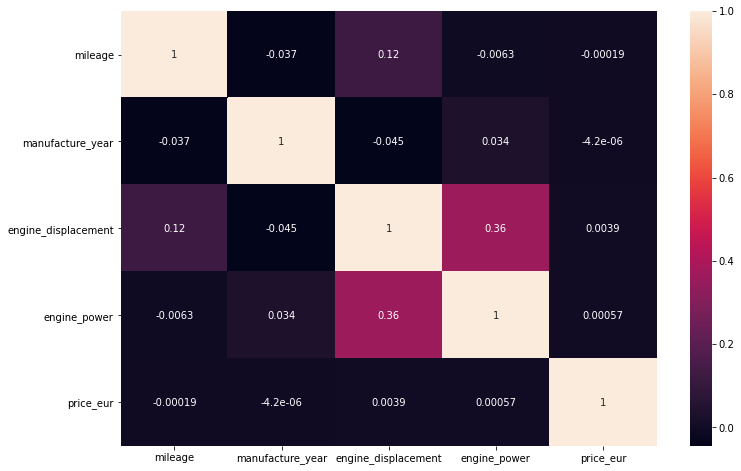

In [0]:
##using heat-maps to observe the correlation amaong numerical features
correlation_matrix = car_ads_data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## Misssing Interpretation

In [0]:
car_ads_data.isnull().sum()

maker                   518915
model                  1133361
mileage                 362584
manufacture_year        370578
engine_displacement     743414
engine_power            554877
body_type              1122914
color_slug             3343411
stk_year               1708156
transmission            741630
door_count              614373
seat_count              749489
fuel_type              1847606
date_created                 0
date_last_seen               0
price_eur                    0
dtype: int64

The above output shows the sum of `nan` values present in the features of the datset. Since, the dataset contains large data, the information from above output is not clear. So, for that the `nan` values sum is converted into percentage as shown in the output below.

In [0]:
for i in car_ads_data.columns:
  print(i,"              ", car_ads_data[i].isnull().sum()/len(car_ads_data)*100)

maker                14.605343447853478
model                31.899495399829775
mileage                10.205262612752582
manufacture_year                10.430261149164403
engine_displacement                20.924075800357567
engine_power                15.617527256515217
body_type                31.605454905722404
color_slug                94.10340025308818
stk_year                48.07763322029929
transmission                20.87386346748808
door_count                17.29209729934206
seat_count                21.095062303822893
fuel_type                52.002582670215304
date_created                0.0
date_last_seen                0.0
price_eur                0.0


From above output, it can be seen that `color_slug` contains `94%`, `body_type and model` contains `32%` missing values. The features containing more than `30%` missing values needs to be removed as it doesnot provide good result if imputed. Here, the dataset is large, so features `body_type and model` containing missing values rows are only removed(only after observing datasets percentage decreased after removing rows).  But, features having more than `90%` missing values are removed as shown below. Although `fuel_type`, `stk_year`  contains `48%` ,`52%` missing value, they wiil or wii not need to be removed will be decided after further analysis.

In [0]:
## droopping features containing missing values greater than 40%
car_ads_data.drop(columns=['color_slug'], inplace=True)

In [0]:
## onserving features info after removing features
car_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 15 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   stk_year             object 
 8   transmission         object 
 9   door_count           object 
 10  seat_count           object 
 11  fuel_type            object 
 12  date_created         object 
 13  date_last_seen       object 
 14  price_eur            float64
dtypes: float64(5), object(10)
memory usage: 406.6+ MB


Observing dataset precentage decreased that after removing rows containing missing values greater than 30%

####Observation 1

In [0]:
df1 = car_ads_data.copy()


In [0]:
df1.dropna(thresh=10, inplace=True)

In [0]:
len(df1)/len(car_ads_data)

0.8807454279756999

In [0]:
for i in df1.columns:
  print(i,"              ", df1[i].isnull().sum()/len(df1)*100)

maker                12.645200339638329
model                30.106822454605968
mileage                5.356206404745477
manufacture_year                7.7047536903072364
engine_displacement                13.2558334992431
engine_power                7.79599074654921
body_type                34.78662832260272
stk_year                44.53918256071579
transmission                13.000817138889003
door_count                8.915602047928376
seat_count                12.910506833831276
fuel_type                48.819207141992024
date_created                0.0
date_last_seen                0.0
price_eur                0.0


In [0]:
df1.dropna(subset=['model'], inplace=True)

In [0]:
len(df1)/len(car_ads_data)

0.6155809656979965

In [0]:
for i in df1.columns:
  print(i,"              ", df1[i].isnull().sum()/len(df1)*100)

maker                0.0
model                0.0
mileage                5.787285018323309
manufacture_year                8.314507076706422
engine_displacement                12.806243870321726
engine_power                7.335678899732752
body_type                25.910415823657303
stk_year                52.87903415702493
transmission                14.13722706500145
door_count                11.422405417206765
seat_count                15.9899959078325
fuel_type                55.78200406473397
date_created                0.0
date_last_seen                0.0
price_eur                0.0


From above observation, it can be concluded that if the rows having at least  **10 null values** are removed, there will still be **80%** of data with us. ALong with removal of the rows containing missing values in `model` feature, there will still be more than **58%** data along with removal of missing vlaues from one of feature column,`maker`, but one of the feature,`body_type`, stillcontains more than **25%** missing values, which are going to remove as it will decrease the dataset greatly.

####Observation 2

In [0]:
df2 = car_ads_data.copy()

In [0]:
df2.dropna(thresh=11, inplace=True)

In [0]:
len(df2)/len(car_ads_data)

0.8166183119649459

In [0]:
for i in df2.columns:
  print(i,"              ", df2[i].isnull().sum()/len(df2)*100)

maker                12.069906213368636
model                29.257286119364867
mileage                3.894604382132184
manufacture_year                6.6910390356565665
engine_displacement                9.784264208703949
engine_power                5.064429840630626
body_type                36.20399721097563
stk_year                43.58670877546596
transmission                10.034145902646781
door_count                5.72963214312672
seat_count                9.024106862509578
fuel_type                48.06662225091362
date_created                0.0
date_last_seen                0.0
price_eur                0.0


In [0]:
df2.dropna(subset=['model'], inplace=True)

In [0]:
len(df2)/len(car_ads_data)

0.5776979559302341

In [0]:
for i in df2.columns:
  print(i,"              ", df2[i].isnull().sum()/len(df2)*100)

maker                0.0
model                0.0
mileage                4.467944126947007
manufacture_year                7.275823260300802
engine_displacement                10.108744902582693
engine_power                5.743894061417484
body_type                27.608586559870595
stk_year                51.44135716756557
transmission                11.767250829472207
door_count                7.473240081656119
seat_count                11.187083132359891
fuel_type                54.29781097290635
date_created                0.0
date_last_seen                0.0
price_eur                0.0


From above observation, it can be concluded that if the rows having at least  **11 null values** are removed, there will still be **67%** of data with us. ALong with removal of the rows containing missing values in `model` feature, there will still be more than **53%** data along with removal of missing vlaues from one of feature column,`maker`, but one of the feature,`body_type`, stillcontains more than **26%** missing values, which are going to remove as it will decrease the dataset greatly.

#### Observation 3

In [0]:
df3 = car_ads_data.copy()

In [0]:
df3.dropna(thresh=9, inplace=True)

In [0]:
len(df3)/len(car_ads_data)

0.9326710033910213

In [0]:
for i in df3.columns:
  print(i,"              ", df3[i].isnull().sum()/len(df3)*100)

maker                13.729072474317213
model                30.884166269829056
mileage                6.858832639546512
manufacture_year                8.391229375760858
engine_displacement                16.45288737839115
engine_power                10.774156244775474
body_type                33.883232569775515
stk_year                45.35621532197563
transmission                16.10973601094608
door_count                11.979395829070723
seat_count                15.979096465640502
fuel_type                49.490478613319624
date_created                0.0
date_last_seen                0.0
price_eur                0.0


In [0]:
df3.dropna(subset=['model'], inplace=True)

In [0]:
len(df3)/len(car_ads_data)

0.6446233399532553

In [0]:
for i in df3.columns:
  print(i,"              ", df3[i].isnull().sum()/len(df3)*100)

maker                0.0
model                0.0
mileage                7.0914600334455455
manufacture_year                8.496522274471792
engine_displacement                15.09917957987853
engine_power                9.301747813595657
body_type                24.74311113439783
stk_year                54.37066921656209
transmission                16.52620410515699
door_count                15.245318278471284
seat_count                19.77024743591423
fuel_type                57.27466827345009
date_created                0.0
date_last_seen                0.0
price_eur                0.0


From above observation, it can be concluded that if the rows having at least  **9 null values** are removed, there will still be **88%** of data with us. ALong with removal of the rows containing missing values in `model` feature, there will still be more than **63%** data along with removal of missing vlaues from one of feature column,`maker`, but one of the feature,`body_type`, stillcontains more than **25%** missing values, which are going to remove as it will decrease the dataset greatly.

####Conclusion

Fom above three observations, it can be concluded onservation is the best suited although the data is only more than **53%**. As `body-maker`, still contains a lot missing values, this feature will be dropped. Now, let's apply observation 2 in our dataset.

In [0]:
car_ads_data.dropna(thresh=11, inplace=True)

In [0]:
for i in car_ads_data.columns:
  print(i,"              ",car_ads_data[i].isnull().sum()/len(car_ads_data)*100)

maker                12.069906213368636
model                29.257286119364867
mileage                3.894604382132184
manufacture_year                6.6910390356565665
engine_displacement                9.784264208703949
engine_power                5.064429840630626
body_type                36.20399721097563
stk_year                43.58670877546596
transmission                10.034145902646781
door_count                5.72963214312672
seat_count                9.024106862509578
fuel_type                48.06662225091362
date_created                0.0
date_last_seen                0.0
price_eur                0.0


In [0]:
car_ads_data.dropna(subset=['model'], inplace=True)


In [0]:
for i in car_ads_data.columns:
  print(i,"              ", car_ads_data[i].isnull().sum()/len(car_ads_data)*100)

maker                0.0
model                0.0
mileage                4.467944126947007
manufacture_year                7.275823260300802
engine_displacement                10.108744902582693
engine_power                5.743894061417484
body_type                27.608586559870595
stk_year                51.44135716756557
transmission                11.767250829472207
door_count                7.473240081656119
seat_count                11.187083132359891
fuel_type                54.29781097290635
date_created                0.0
date_last_seen                0.0
price_eur                0.0


In [0]:
cat_cols = car_ads_data.select_dtypes(include=['object']).columns
cat_cols

Index(['maker', 'model', 'body_type', 'stk_year', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'date_created', 'date_last_seen'],
      dtype='object')

In [0]:
missing_plot_cols = [ 'transmission', 'door_count', 'seat_count', 'body_type', 'stk_year', 'fuel_type']

In [0]:
num_cols = car_ads_data.select_dtypes(include=['float64', 'int64']).columns
num_cols

Index(['mileage', 'manufacture_year', 'engine_displacement', 'engine_power',
       'price_eur'],
      dtype='object')

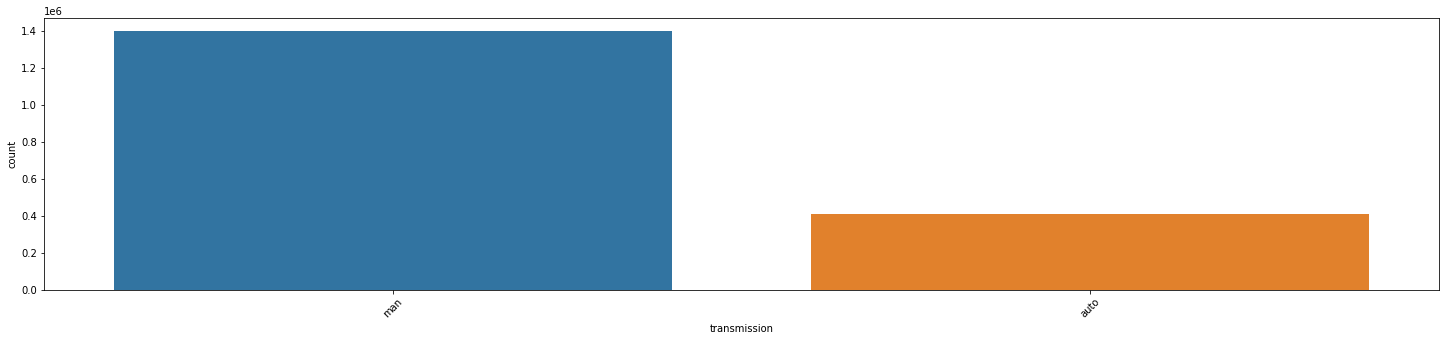

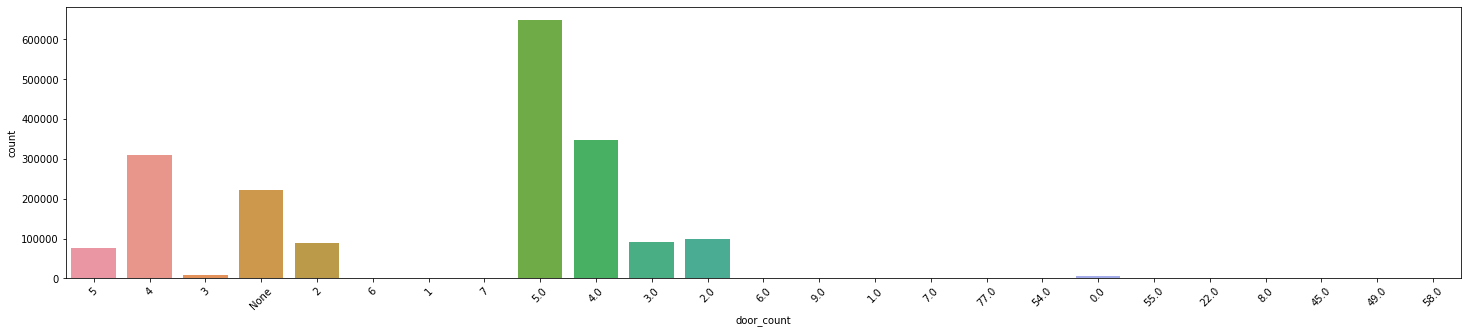

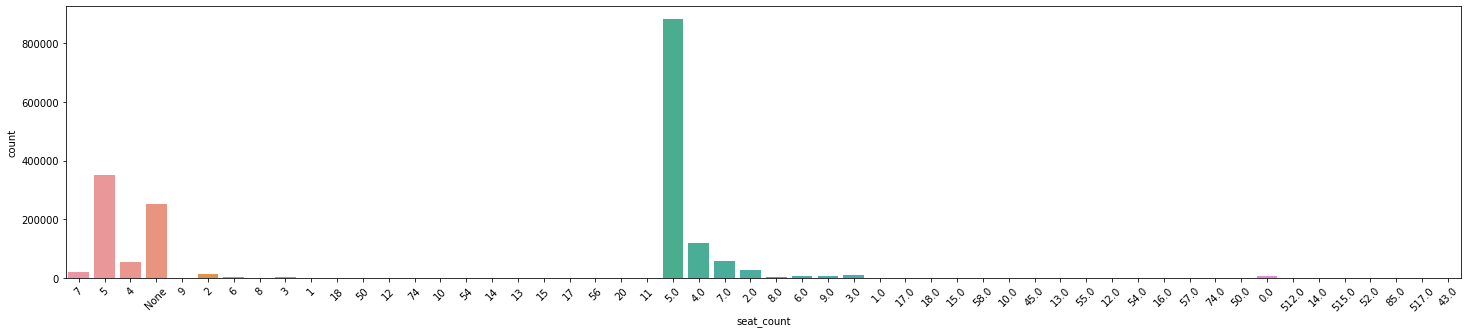

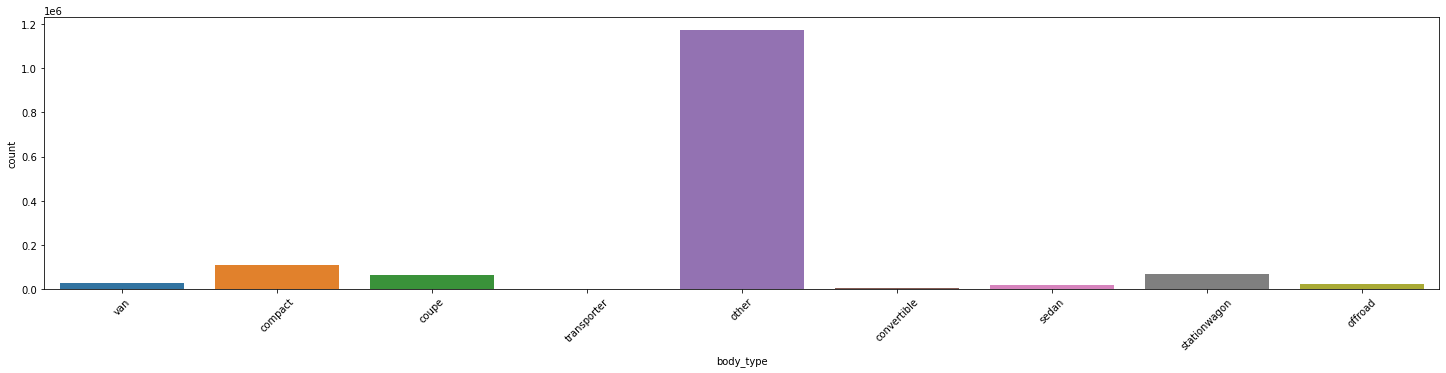

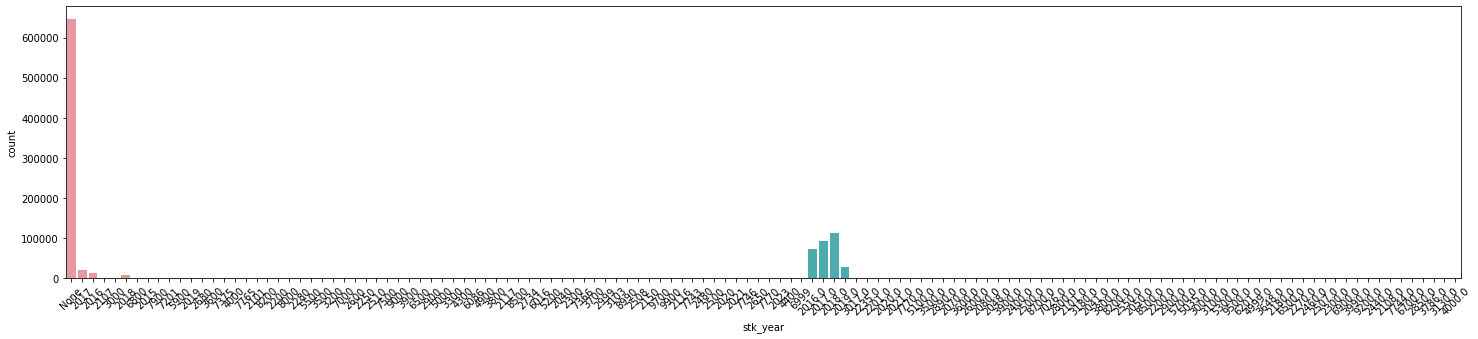

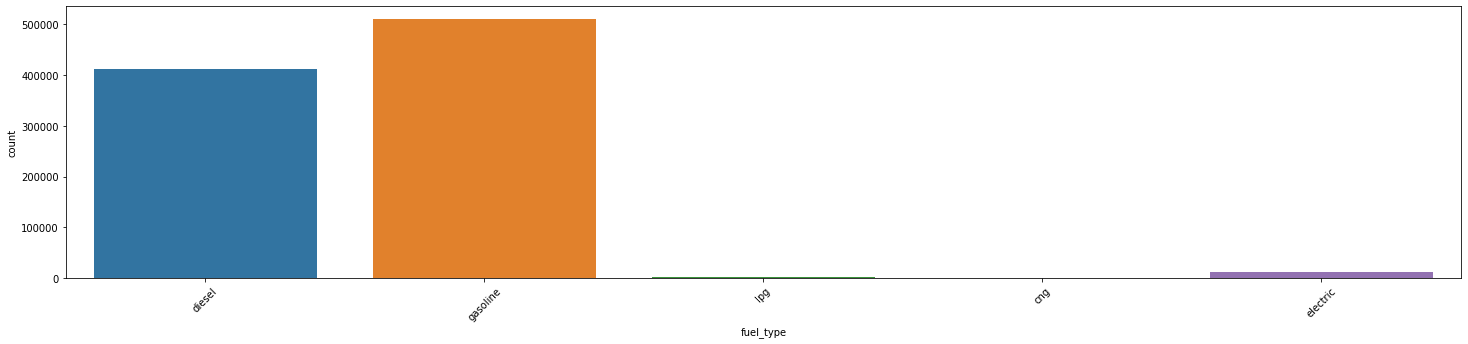

In [0]:
## countplot helps to observe the frequency of elements present in the categorical feature
for i in missing_plot_cols:
  fig, ax1 = plt.subplots(figsize=(25,5))
  plot = sns.countplot(x=i, data=car_ads_data, orient='h')
  for index, item in enumerate(plot.get_xticklabels()):
    item.set_rotation(45)

###Handling Missing values in categorical features





#### observing `transmission` feature and handling misssing values

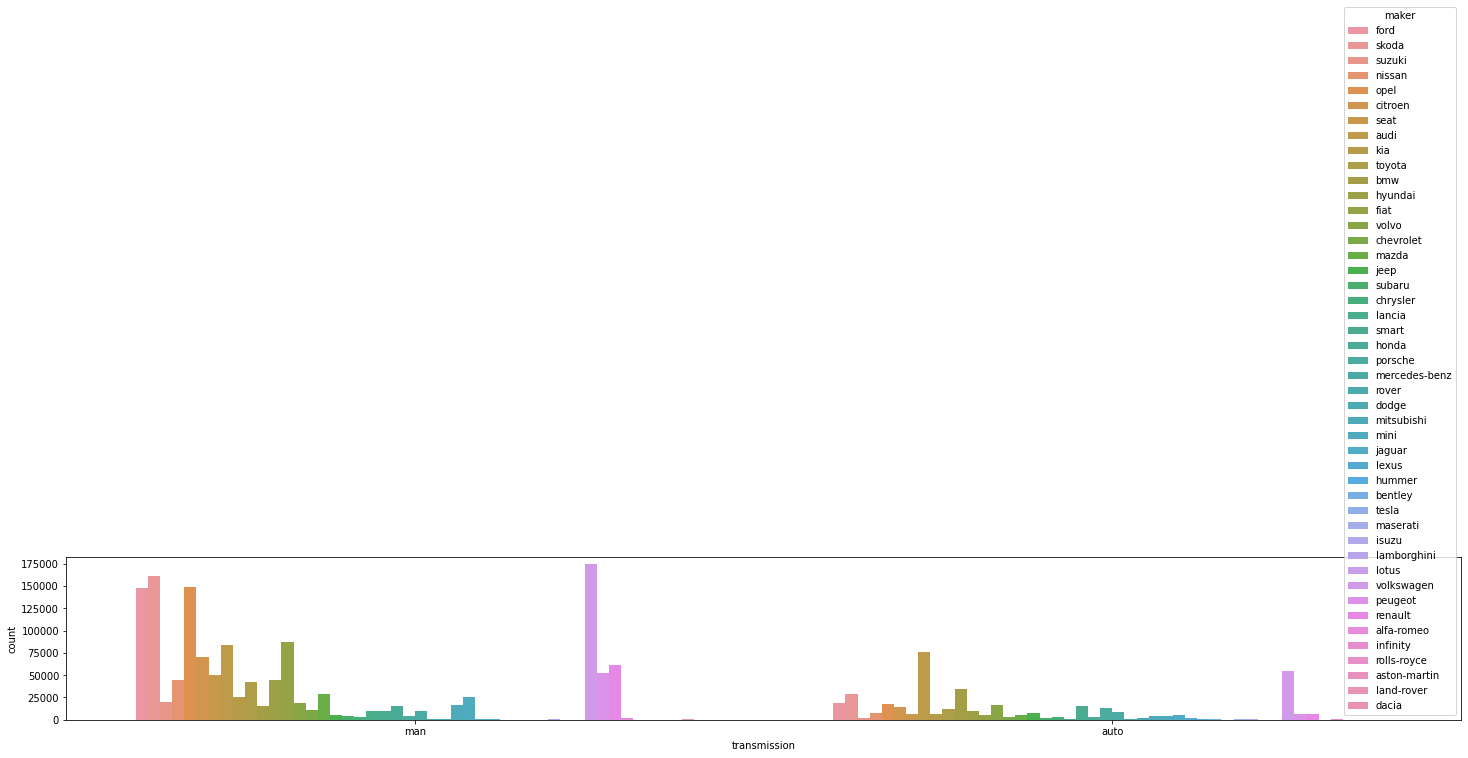

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='transmission', hue='maker', data=car_ads_data)


From above, it can be observed most of the car maker have `manaul` transmission.

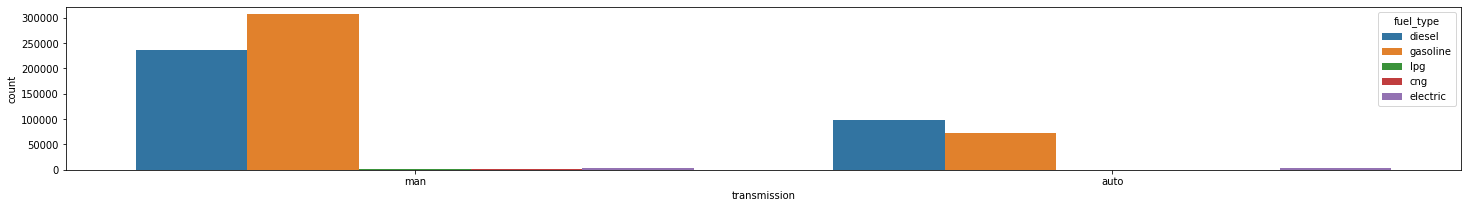

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='transmission', hue='fuel_type', data=car_ads_data)


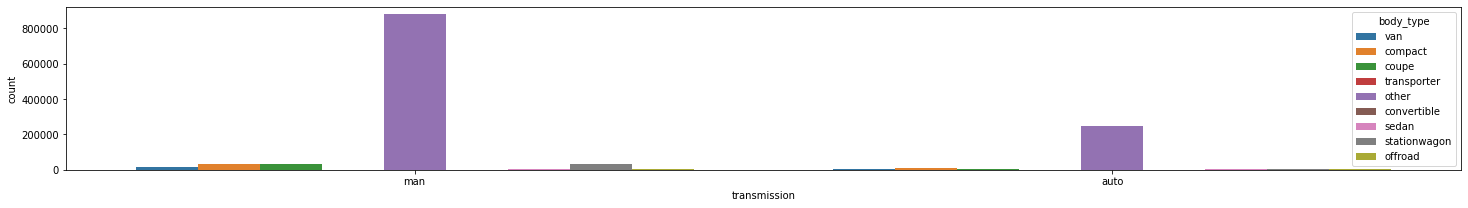

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='transmission', hue='body_type', data=car_ads_data)

From above plots, it can be observed that most of the transmission is manaual. So, let's fill the `nan vlaues` with mode.

In [0]:
car_ads_data['transmission'].fillna(car_ads_data['transmission'].mode()[0], inplace=True)

In [0]:
car_ads_data['transmission'].isnull().sum()


0

#### observing `body_type` feature and handling misssing values

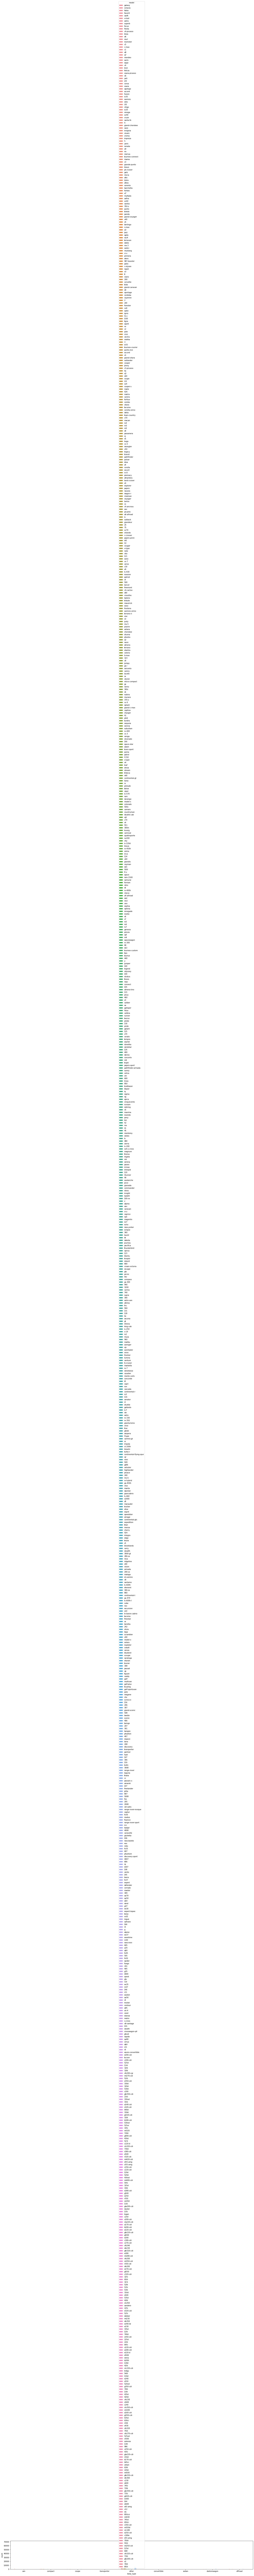

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='body_type', hue='model', data=car_ads_data)

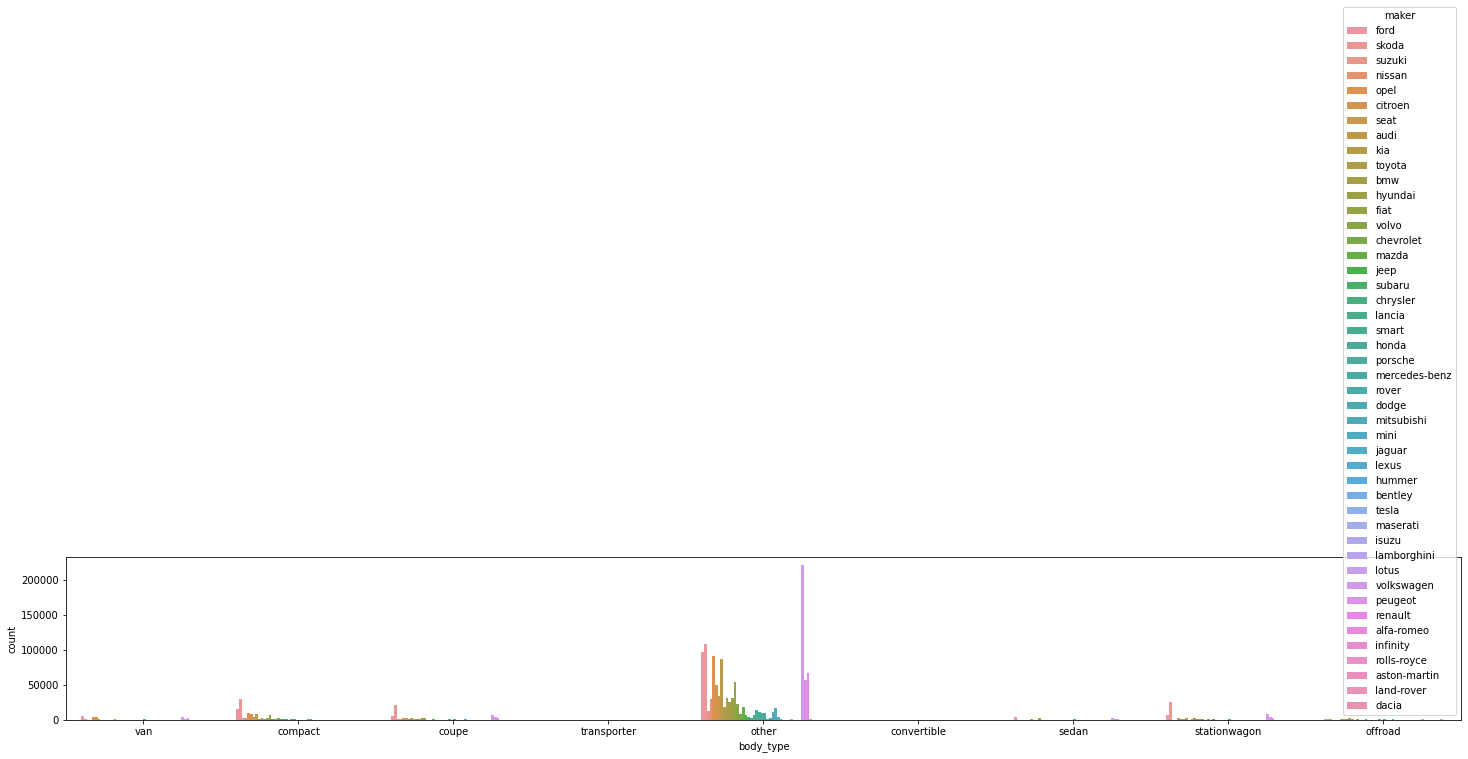

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='body_type', hue='maker', data=car_ads_data)

From abvove two observations, it can be observed that most of the `model and maker` feature have `other` element in `body_type` feature. So, replacing the nan values in it by `other`.

In [0]:
car_ads_data['body_type'].fillna('other', inplace=True)

In [0]:
car_ads_data['body_type'].isnull().sum()

0

#### observing `fuel_type` feature and handling misssing values


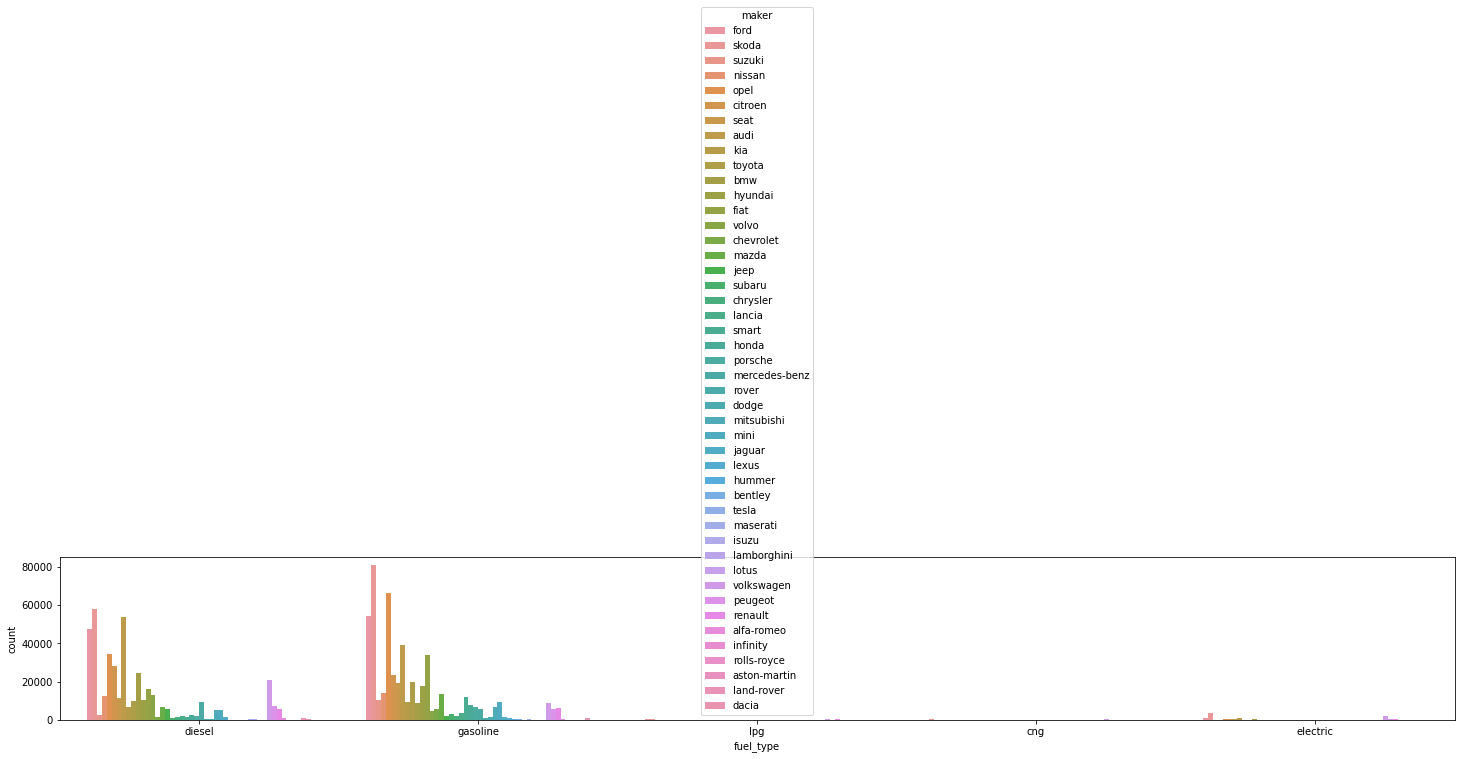

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='fuel_type', hue='maker', data=car_ads_data)

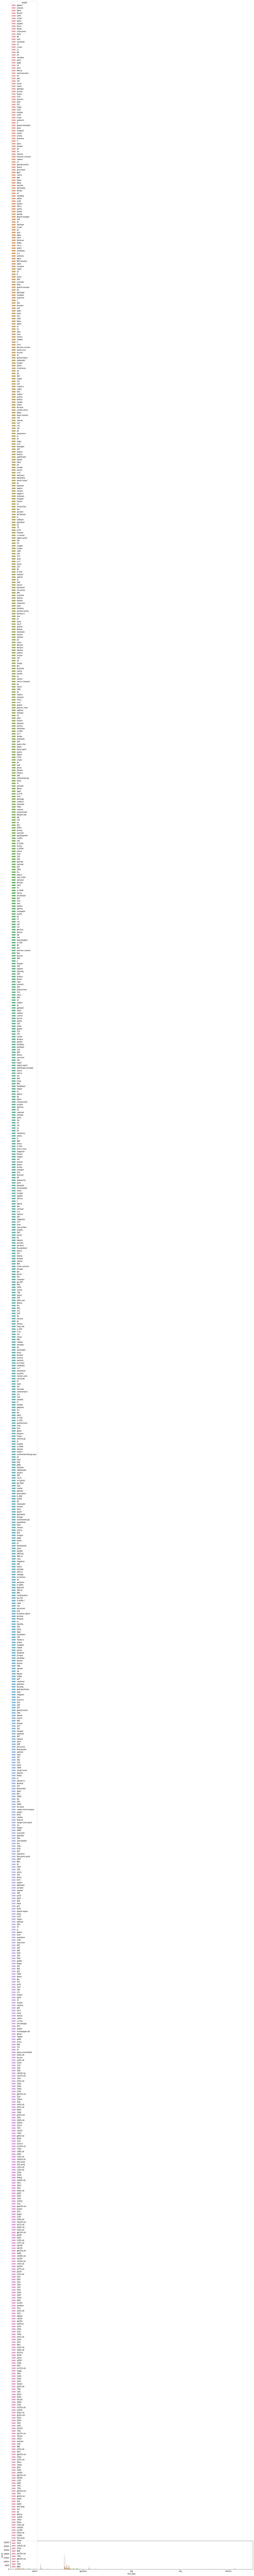

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='fuel_type', hue='model', data=car_ads_data)

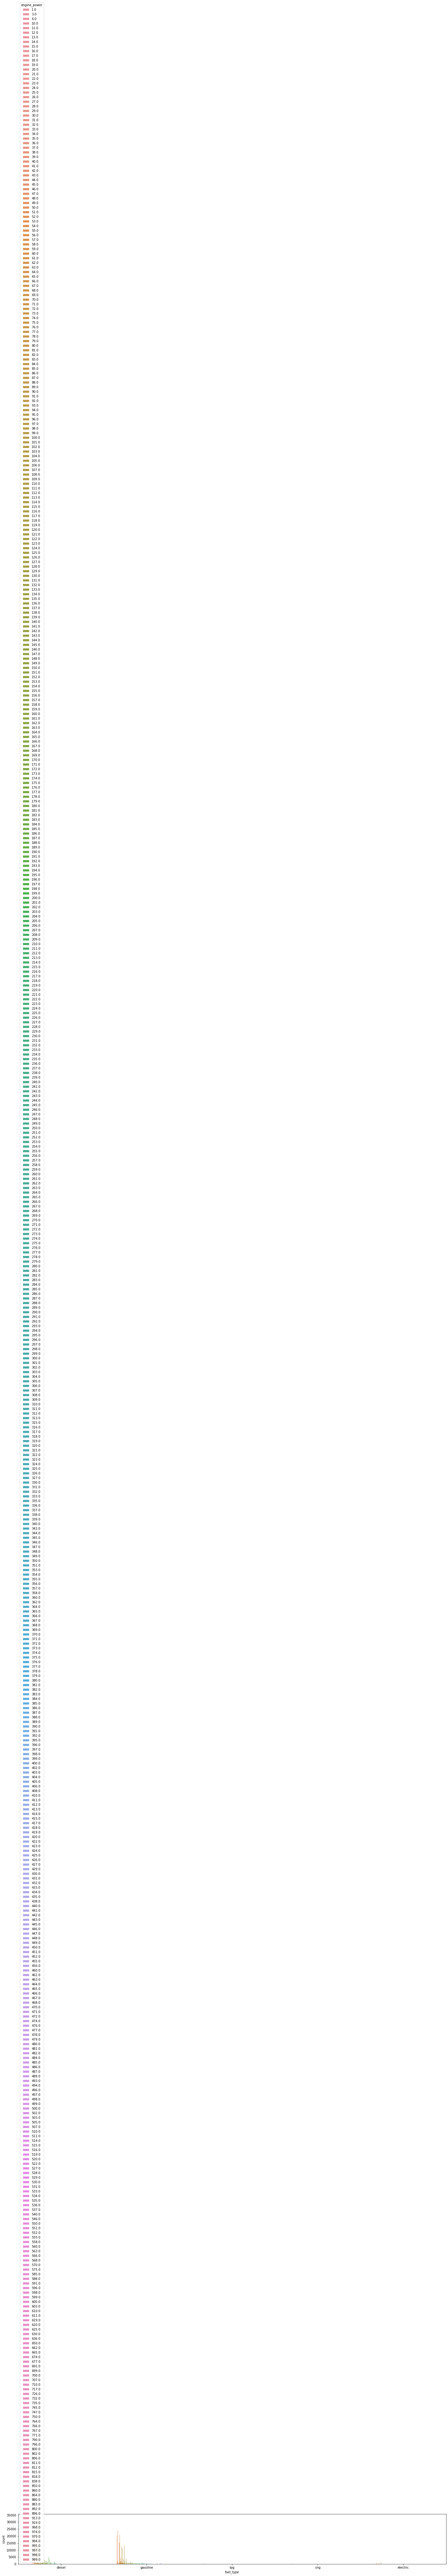

In [0]:
fig, ax1 = plt.subplots(figsize=(25,3))
sns.countplot(x='fuel_type', hue='engine_power', data=car_ads_data)

In [0]:
car_ads_data['fuel_type'].fillna(car_ads_data['fuel_type'].mode()[0], inplace=True)

In [0]:
car_ads_data['fuel_type'].isnull().sum()


0

#### filling missing values for remaining categorical data using ffill

In [0]:
car_ads_data['stk_year'].fillna(method ='ffill', inplace=True)

In [0]:
car_ads_data['stk_year'].isnull().sum()


0

In [0]:
car_ads_data['door_count'].fillna(method ='ffill', inplace=True)

In [0]:
car_ads_data['door_count'].isnull().sum()


0

In [0]:
car_ads_data['seat_count'].fillna(method ='ffill', inplace=True)


In [0]:
car_ads_data.isnull().sum()

maker                       0
model                       0
mileage                 91705
manufacture_year       149337
engine_displacement    207483
engine_power           117894
body_type                   0
stk_year                    0
transmission                0
door_count                  0
seat_count                  0
fuel_type                   0
date_created                0
date_last_seen              0
price_eur                   0
dtype: int64

### Handling missing values in Numerical dataset

In [0]:
num_cols

Index(['mileage', 'manufacture_year', 'engine_displacement', 'engine_power',
       'price_eur'],
      dtype='object')

In [0]:
missing_num_cols =['mileage', 'manufacture_year', 'engine_displacement', 'engine_power'] 

In [0]:
for i in missing_num_cols:
  car_ads_data[i].fillna(car_ads_data[i].median(), inplace=True)

In [0]:
car_ads_data.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
stk_year               0
transmission           0
door_count             0
seat_count             0
fuel_type              0
date_created           0
date_last_seen         0
price_eur              0
dtype: int64

## outliers handling

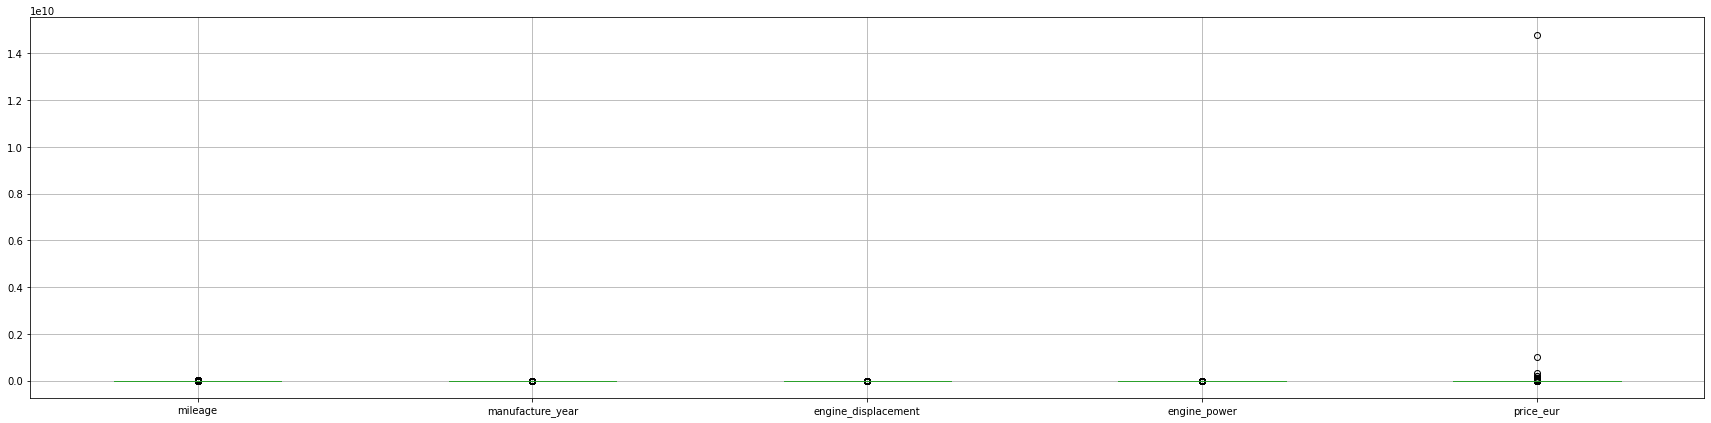

In [0]:
plt.figure(figsize=(30,7))
car_ads_data.boxplot() 

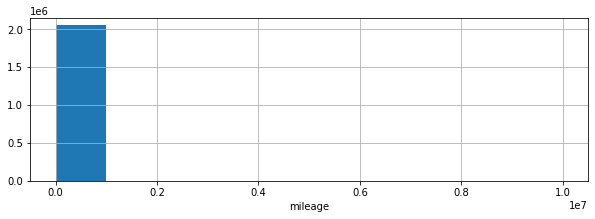

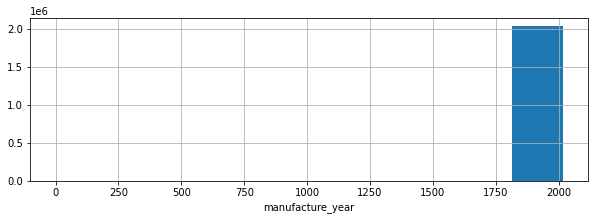

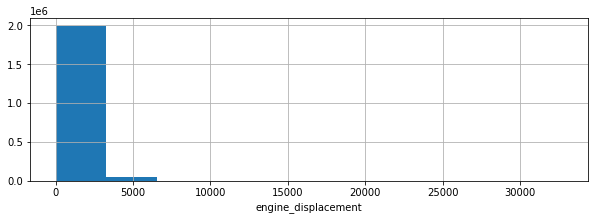

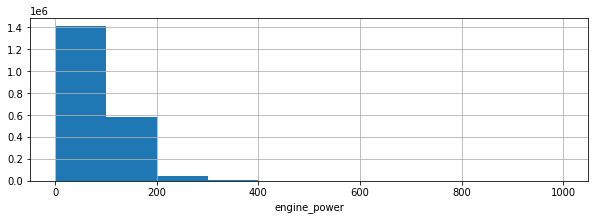

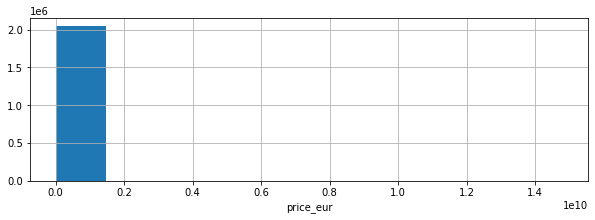

In [0]:
for i in num_cols:
  plt.figure(figsize=(10,3))
  car_ads_data[i].hist()
  plt.xlabel(i)
  plt.plot()

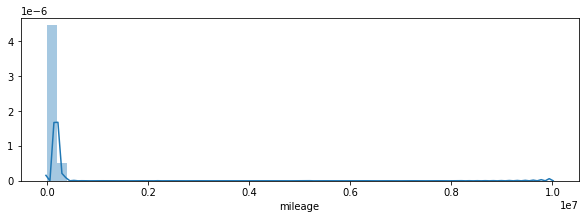

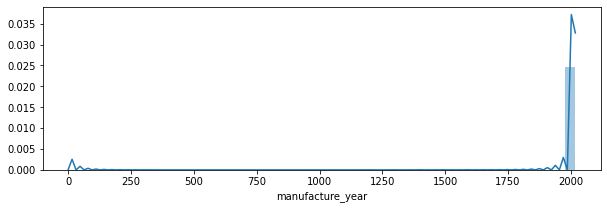

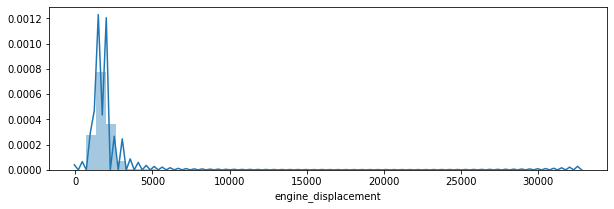

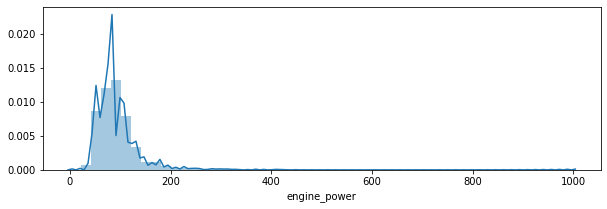

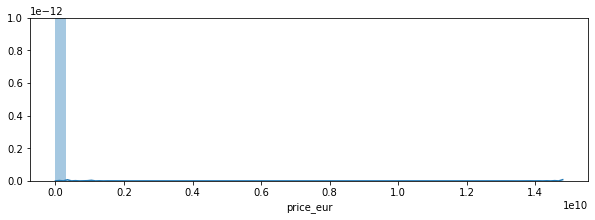

In [0]:
for i in num_cols:
  plt.figure(figsize=(10,3))
  ax = sns.distplot(car_ads_data[i])

In [0]:
car_ads_data['manufacture_year'].value_counts()

2015.0    293808
2010.0    251319
2012.0    150708
2011.0    141102
2014.0    119977
           ...  
1531.0         1
1527.0         1
1525.0         1
1518.0         1
512.0          1
Name: manufacture_year, Length: 1211, dtype: int64

## Variable Transformation

### Categorical Transformation

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
cat_cols

Index(['maker', 'model', 'body_type', 'stk_year', 'transmission', 'door_count',
       'seat_count', 'fuel_type', 'date_created', 'date_last_seen'],
      dtype='object')

#### `model feature`

In [0]:
car_ads_data['model'].value_counts()

octavia       102276
golf           74906
fabia          71629
astra          52625
focus          52371
               ...  
metro              1
cirrus             1
q60                1
428i               1
glk200-cdi         1
Name: model, Length: 982, dtype: int64

In model, there are too many levels. So, let's drop this row.

In [0]:
car_ads_data.drop(columns=['model'], inplace=True)

#### `maker` feature

In [0]:
car_ads_data['maker'].value_counts()


volkswagen       245026
skoda            239973
ford             193469
opel             189976
audi             178041
fiat             102092
citroen           98935
renault           75400
peugeot           67027
seat              64319
toyota            59341
hyundai           59101
bmw               57908
nissan            56310
volvo             39287
mazda             38618
kia               34261
mini              31331
smart             27579
suzuki            25205
mercedes-benz     23220
mitsubishi        22368
honda             21347
porsche           18158
chevrolet         15492
jeep              14595
lancia            11957
subaru             8139
jaguar             7082
chrysler           6807
dodge              3985
lexus              3200
alfa-romeo         2817
rover              2792
maserati           1549
dacia              1233
land-rover         1156
isuzu               976
bentley             729
hummer              516
infinity            433
lamborghini     

In [0]:
len(car_ads_data['maker'].value_counts())

46

There are 46 levels in maker feature. Let's combine the elements having value counts below 8000 into `others` elements.

In [0]:
for key, value in car_ads_data['maker'].value_counts().items():
  if value < 8000:
    car_ads_data['maker'].replace(key, 'others', inplace=True)

In [0]:
car_ads_data['maker'].value_counts()


volkswagen       245026
skoda            239973
ford             193469
opel             189976
audi             178041
fiat             102092
citroen           98935
renault           75400
peugeot           67027
seat              64319
toyota            59341
hyundai           59101
bmw               57908
nissan            56310
volvo             39287
mazda             38618
kia               34261
others            34035
mini              31331
smart             27579
suzuki            25205
mercedes-benz     23220
mitsubishi        22368
honda             21347
porsche           18158
chevrolet         15492
jeep              14595
lancia            11957
subaru             8139
Name: maker, dtype: int64

In [0]:
len(car_ads_data['maker'].value_counts())

29

In [0]:
car_ads_data = pd.get_dummies(car_ads_data, columns=['maker'], prefix=['maker'])

In [0]:
car_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052510 entries, 0 to 3552905
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mileage              float64
 1   manufacture_year     float64
 2   engine_displacement  float64
 3   engine_power         float64
 4   body_type            object 
 5   stk_year             object 
 6   transmission         object 
 7   door_count           object 
 8   seat_count           object 
 9   fuel_type            object 
 10  date_created         object 
 11  date_last_seen       object 
 12  price_eur            float64
 13  maker_audi           uint8  
 14  maker_bmw            uint8  
 15  maker_chevrolet      uint8  
 16  maker_citroen        uint8  
 17  maker_fiat           uint8  
 18  maker_ford           uint8  
 19  maker_honda          uint8  
 20  maker_hyundai        uint8  
 21  maker_jeep           uint8  
 22  maker_kia            uint8  
 23  maker_lancia         uint8  
 24

#### `door_count` feature

In [0]:
car_ads_data['door_count'].value_counts()

5.0     753496
4.0     376197
4       308835
None    220582
2.0     108714
3.0     104360
2        87697
5        76744
3         9149
0.0       5831
6.0        670
6          115
1.0         66
7.0         27
55.0         9
1            5
9.0          4
58.0         2
54.0         1
45.0         1
22.0         1
8.0          1
77.0         1
7            1
49.0         1
Name: door_count, dtype: int64

In [0]:
car_ads_data['door_count'].replace([1.0,2.0,3.0,4.0,5.0,6.0, 7.0, 8.0, 9.0], [1,2,3,4,5,6,7,8,9], inplace=True)

In [0]:
car_ads_data['door_count'].replace([1,2,3,4,5,6,7,8,9],['1','2','3','4','5','6','7','8','9'], inplace=True)

In [0]:
car_ads_data['door_count'].value_counts()

5       830240
4       685032
None    220582
2       196411
3       113509
0.0       5831
6          785
1           71
7           28
55.0         9
9            4
58.0         2
8            1
77.0         1
54.0         1
49.0         1
45.0         1
22.0         1
Name: door_count, dtype: int64

In [0]:
k=[]
replacing_values = [55.0, 58.0, 77.0, 54.0, 49.0, 45.0, 22.0, 0.0, '9', '8', 'None']
for i in replacing_values:
  k.append('others')
k

['others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others',
 'others']

In [0]:
car_ads_data['door_count'].replace(replacing_values, k, inplace=True)

In [0]:
car_ads_data['door_count'].value_counts()

5         830240
4         685032
others    226434
2         196411
3         113509
6            785
1             71
7             28
Name: door_count, dtype: int64

In [0]:
car_ads_data = pd.get_dummies(car_ads_data, columns=['door_count'], prefix=['door_count'])

In [0]:
car_ads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2052510 entries, 0 to 3552905
Data columns (total 49 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mileage              float64
 1   manufacture_year     float64
 2   engine_displacement  float64
 3   engine_power         float64
 4   body_type            object 
 5   stk_year             object 
 6   transmission         object 
 7   seat_count           object 
 8   fuel_type            object 
 9   date_created         object 
 10  date_last_seen       object 
 11  price_eur            float64
 12  maker_audi           uint8  
 13  maker_bmw            uint8  
 14  maker_chevrolet      uint8  
 15  maker_citroen        uint8  
 16  maker_fiat           uint8  
 17  maker_ford           uint8  
 18  maker_honda          uint8  
 19  maker_hyundai        uint8  
 20  maker_jeep           uint8  
 21  maker_kia            uint8  
 22  maker_lancia         uint8  
 23  maker_mazda          uint8  
 24

####`seat_count` feature

In [0]:
car_ads_data['seat_count'].value_counts()

5.0      1066440
5         351262
None      253171
4.0       142026
7.0        69349
4          54859
2.0        32970
7          21360
2          14098
3.0        13369
0.0         7543
6.0         7388
9.0         6746
8.0         3376
3           3146
6           2189
9           1894
8           1038
1.0           81
1             75
17.0          15
12.0          12
10.0          12
12            10
45.0          10
18.0           8
15.0           7
58.0           6
10             6
17             6
13.0           4
54.0           3
14             3
16.0           3
55.0           2
512.0          2
56             2
14.0           2
50             2
18             1
11             1
20             1
13             1
43.0           1
74             1
50.0           1
52.0           1
57.0           1
15             1
85.0           1
515.0          1
517.0          1
54             1
74.0           1
Name: seat_count, dtype: int64

In [0]:
replacing_values = car_ads_data['seat_count'].value_counts().keys()


Index([   5.0,    '5', 'None',    4.0,    7.0,    '4',    2.0,    '7',    '2',
          3.0,    0.0,    6.0,    9.0,    8.0,    '3',    '6',    '9',    '8',
          1.0,    '1',   17.0,   12.0,   10.0,   '12',   45.0,   18.0,   15.0,
         58.0,   '10',   '17',   13.0,   54.0,   '14',   16.0,   55.0,  512.0,
         '56',   14.0,   '50',   '18',   '11',   '20',   '13',   43.0,   '74',
         50.0,   52.0,   57.0,   '15',   85.0,  515.0,  517.0,   '54',   74.0],
      dtype='object')

In [0]:
car_ads_data['seat_count'].replace( [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0], ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], inplace= True)

In [0]:
replacing_values = ['None', 0.0, 85.0, 517.0, '54', 74.0, '11', '12',  '10', '17.0', '50', '18']
replaced_value = ['others' for i in replacing_values]

In [0]:
car_ads_data['seat_count'].value_counts()

5         1417702
others     253171
4          196885
7           90709
2           47068
3           16515
6            9577
9            8640
0.0          7543
8            4414
1             156
12             22
10             18
17.0           15
45.0           10
18.0            8
15.0            7
17              6
58.0            6
13.0            4
14              3
16.0            3
54.0            3
14.0            2
55.0            2
50              2
512.0           2
56              2
43.0            1
11              1
20              1
18              1
74              1
54              1
13              1
74.0            1
50.0            1
52.0            1
15              1
517.0           1
57.0            1
515.0           1
85.0            1
Name: seat_count, dtype: int64

In [0]:
car_ads_data['seat_count'].replace(replacing_values, replaced_value, inplace=True)

In [0]:
car_ads_data['seat_count'].value_counts()

5         1417702
others     260762
4          196885
7           90709
2           47068
3           16515
6            9577
9            8640
8            4414
1             156
17.0           15
45.0           10
18.0            8
15.0            7
58.0            6
17              6
13.0            4
14              3
54.0            3
16.0            3
512.0           2
14.0            2
55.0            2
56              2
74              1
13              1
20              1
15              1
43.0            1
515.0           1
52.0            1
57.0            1
50.0            1
Name: seat_count, dtype: int64

In [0]:
replacing_values = ['17', 17.0, 45.0, 18.0, 15.0, 58.0, 13.0, '14', 54.0, 16.0, 512.0, 14.0, 55.0, '56', '74', '13', '20', '15', 43.0, 515.0, 52.0, 57.0, 50.0]
replaced_value = ['others' for i in replacing_values]

In [0]:
car_ads_data['seat_count'].replace(replacing_values, replaced_value, inplace=True)

In [0]:
car_ads_data['seat_count'].value_counts()

5         1417702
others     260844
4          196885
7           90709
2           47068
3           16515
6            9577
9            8640
8            4414
1             156
Name: seat_count, dtype: int64

In [0]:
car_ads_data = pd.get_dummies(car_ads_data, columns=['seat_count'], prefix=['seat_Count'])

#### `body_type` feature

In [0]:
car_ads_data['body_type'].value_counts()

other           1738063
compact          110206
stationwagon      67830
coupe             66369
van               25962
offroad           21239
sedan             18247
convertible        3146
transporter        1448
Name: body_type, dtype: int64

In [0]:
car_ads_data = pd.get_dummies(car_ads_data, columns=['body_type'], prefix=['body_type'])

#### `transmisssion` feature

In [0]:
car_ads_data['transmission'].value_counts()

man     1642265
auto     410245
Name: transmission, dtype: int64

In [0]:
car_ads_data = pd.get_dummies(car_ads_data, columns=['transmission'], prefix=['transmission'])

`stk_year` feature

In [0]:
car_ads_data['stk_year'].value_counts()

None      645473
2018.0    526800
2017.0    443484
2016.0    288805
2019.0     88131
           ...  
2150           1
5500           1
7000           1
3100.0         1
2999           1
Name: stk_year, Length: 128, dtype: int64

In [0]:
car_ads_data.drop(columns=['stk_year'], inplace=True)

#### `date_created` and `date_last_seen` feature

In [0]:
car_ads_data['date_created'].value_counts()


2015-11-17 02:06:56.826872+00    1
2016-02-28 16:34:16.958047+00    1
2016-12-02 16:49:21.918608+00    1
2016-02-19 02:07:58.597613+00    1
2016-11-10 17:03:01.092924+00    1
                                ..
2016-01-09 18:41:57.018554+00    1
2016-12-08 16:36:35.372715+00    1
2015-12-20 08:35:21.083113+00    1
2016-02-24 13:34:58.760391+00    1
2015-12-08 00:16:01.551361+00    1
Name: date_created, Length: 2052510, dtype: int64

In [0]:
car_ads_data['date_last_seen'].value_counts()

2016-01-27 20:40:15.46361+00     91085
2017-02-08 01:18:28.643605+00        1
2015-12-14 12:19:17.396829+00        1
2017-03-13 01:30:42.672158+00        1
2016-07-03 19:04:19.132095+00        1
                                 ...  
2016-07-03 19:01:46.380363+00        1
2016-07-03 17:03:37.649312+00        1
2016-01-06 07:16:05.527791+00        1
2016-07-03 18:02:55.276491+00        1
2016-10-09 14:50:57.040824+00        1
Name: date_last_seen, Length: 1961426, dtype: int64

In [0]:
## create anew feature by substracting date_last_seen from date_created to see ad shown day

car_ads_data['ad_shown_day'] = pd.to_datetime(car_ads_data['date_last_seen'])- pd.to_datetime(car_ads_data['date_created'])

In [0]:
car_ads_data['ad_shown_day'].head()

0   74 days 02:30:08.625291
1   74 days 02:30:08.610199
3   74 days 02:30:08.591297
4   74 days 02:30:08.583275
5   74 days 02:30:08.568967
Name: ad_shown_day, dtype: timedelta64[ns]

In [0]:
car_ads_data['ad_shown_day'] = car_ads_data['ad_shown_day'].dt.days


In [0]:
car_ads_data['ad_shown_day'].head()

0    74
1    74
3    74
4    74
5    74
Name: ad_shown_day, dtype: int64

In [0]:
car_ads_data['ad_shown_day'].value_counts()

60     116809
0       86023
1       50998
143     49335
6       46876
        ...  
102       423
157       418
101       366
103       276
112       263
Name: ad_shown_day, Length: 147, dtype: int64

In [0]:
car_ads_data.drop(columns=['ad_shown_day', 'date_created', 'date_last_seen'], inplace=True)

#### `fuel_type` feature

In [0]:
car_ads_data['fuel_type'].value_counts()

gasoline    1624422
diesel       412880
electric      11314
lpg            3077
cng             817
Name: fuel_type, dtype: int64

In [0]:
car_ads_data = pd.get_dummies(car_ads_data, columns=['fuel_type'], prefix=['fuel'])

###Numerical Transformation

In [0]:
from sklearn.preprocessing import RobustScaler
rc = RobustScaler()


In [0]:
car_ads_data.columns

Index(['mileage', 'manufacture_year', 'engine_displacement', 'engine_power',
       'price_eur', 'maker_audi', 'maker_bmw', 'maker_chevrolet',
       'maker_citroen', 'maker_fiat', 'maker_ford', 'maker_honda',
       'maker_hyundai', 'maker_jeep', 'maker_kia', 'maker_lancia',
       'maker_mazda', 'maker_mercedes-benz', 'maker_mini', 'maker_mitsubishi',
       'maker_nissan', 'maker_opel', 'maker_others', 'maker_peugeot',
       'maker_porsche', 'maker_renault', 'maker_seat', 'maker_skoda',
       'maker_smart', 'maker_subaru', 'maker_suzuki', 'maker_toyota',
       'maker_volkswagen', 'maker_volvo', 'door_count_1', 'door_count_2',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_count_6',
       'door_count_7', 'door_count_others', 'seat_Count_1', 'seat_Count_2',
       'seat_Count_3', 'seat_Count_4', 'seat_Count_5', 'seat_Count_6',
       'seat_Count_7', 'seat_Count_8', 'seat_Count_9', 'seat_Count_others',
       'body_type_compact', 'body_type_convertible', 'body_type_co

In [0]:
car_ads_data = pd.DataFrame(rc.fit_transform(car_ads_data))


RangeIndex(start=0, stop=68, step=1)